# 03 BMRA

Run BMRA based on global responses derived from the pathway activity predictions.

In [1]:
import pandas as pd
import numpy as np
import os
import bmra

In [2]:
cell_line = 'BC3C'

data_dir =f'/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_bmra/blca_publication_OUTPUT_bmra_{cell_line}/'
data_dir_1 = os.path.join(data_dir, f'00_outputs_2020_{cell_line}/')
data_dir_2 = os.path.join(data_dir, f'01_outputs_2020_{cell_line}/')

info_dir =f"/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_LINCS/00_outputs_2020_{cell_line}/"

out_dir = os.path.join(data_dir,f'02_outputs_2020_{cell_line}/')


os.makedirs(out_dir, exist_ok = True)

## Load data

### Global responses

Assembled from global responses calculated from predicted pathway activities, and DPD global responses.

In [3]:
def assemble_R_global(pathway_rglobal_file, dpd_rglobal_file):
    """
    Assemble full R_global matrix
    """
    R_global_modules_df = pd.read_csv(pathway_rglobal_file, index_col = 0)

    perts = R_global_modules_df.columns.tolist()

    R_global_DPD_df = pd.read_csv(dpd_rglobal_file, index_col=0).T

    # filter by perts list
    R_global_DPD_df = R_global_DPD_df[R_global_DPD_df.index.isin(perts)]

    # sort by perts list
    R_global_DPD_df["sort_col"] = R_global_DPD_df.index.map({val: i for i, val in enumerate(perts)})
    R_global_DPD_df = R_global_DPD_df.sort_values("sort_col")
    R_global_DPD_df = R_global_DPD_df.drop("sort_col", axis = 1)

    # transpose
    R_global_DPD_df = R_global_DPD_df.T

    R_global_df = pd.concat([R_global_modules_df, R_global_DPD_df])

    return R_global_df

In [4]:
R_global_df = assemble_R_global(
    pathway_rglobal_file = os.path.join(data_dir_2, "R_global_annotated.csv"),
    dpd_rglobal_file = os.path.join(data_dir_1, "R_global_DPDonly_annotated.csv"),
)

modules = R_global_df.index.tolist()
exp_ids = R_global_df.columns.tolist()

R_global = R_global_df.values
n_modules = R_global.shape[0]

print(R_global.shape)
display(R_global_df)

(13, 101)


,ASG002_BC3C_24H:A10,ASG002_BC3C_24H:A11,ASG002_BC3C_24H:A19,ASG002_BC3C_24H:A20,ASG002_BC3C_24H:A21,ASG002_BC3C_24H:B10,ASG002_BC3C_24H:B11,ASG002_BC3C_24H:B14,ASG002_BC3C_24H:B15,ASG002_BC3C_24H:C13,...,MOAR010_BC3C_24H:L20,MOAR011_BC3C_24H:C01,MOAR011_BC3C_24H:C02,MOAR011_BC3C_24H:C03,MOAR011_BC3C_24H:C10,MOAR011_BC3C_24H:C11,MOAR011_BC3C_24H:F07,MOAR011_BC3C_24H:F08,MOAR011_BC3C_24H:F09,MOAR011_BC3C_24H:J10
Androgen,-0.052205,-0.009637,0.001458,-0.040076,0.001462,0.020136,0.004311,0.016317,0.020567,0.035863,...,-0.044460,-0.015874,-0.001836,-0.009356,-0.052550,-0.004687,-0.055101,0.029626,0.026057,-0.588229
CDK1,-1.370532,-1.096315,0.158076,-0.415599,0.142851,-0.396843,0.175272,0.357992,0.121663,0.191247,...,-0.041579,-0.070601,-0.292598,-0.170956,-0.211362,-0.063809,-0.952346,0.020134,-0.051757,-0.085772
CDK2,-0.199628,-0.179097,-0.033936,-0.009521,-0.001534,-0.026391,0.010606,-0.036194,0.028296,-0.004736,...,-0.040186,-0.012025,-0.001244,-0.001947,-0.022200,0.023793,-0.058737,-0.029688,-0.032806,-0.004377
CDK4_6,-0.025560,-0.234152,-0.041990,-0.514687,0.040537,0.002469,-0.007975,0.097475,0.086086,0.032284,...,-0.574120,0.048721,0.097801,-0.089174,-1.036702,-1.209372,0.318559,0.199071,-0.063200,-0.014663
EGFR,0.593527,0.494842,0.226497,0.364155,0.488417,0.111375,-0.414051,0.263987,0.283782,-0.048051,...,0.177674,0.043750,-0.055218,-0.034943,-0.085847,-0.422730,-0.448268,-0.557163,-0.312660,-0.226505
Estrogen,-0.129022,-0.211317,-0.197229,-0.405123,-0.902831,-0.315390,-0.077474,-0.226972,-0.153746,-0.038831,...,-0.066488,0.056192,0.047125,-0.011484,0.020754,0.129819,-1.487126,-0.228859,0.211322,-0.210604
FGFR,-0.113840,-0.185143,-0.090836,0.052301,-0.028906,-0.409823,-0.029598,-0.040569,-0.065010,-0.293798,...,0.159993,-0.020353,0.061862,-0.008303,0.036716,-0.275223,-0.542730,0.036991,0.227267,0.050912
PI3K,-1.899083,-1.699003,-1.453657,-1.241045,-0.701467,0.287819,-0.136329,-0.239045,-0.832239,-0.280001,...,-0.047727,-0.159268,-0.026473,-0.483874,-0.467464,0.029214,-0.787233,0.232736,-0.236637,0.026072
p53,-0.214295,-0.218556,-0.129010,-0.409512,0.048253,-1.629077,-1.475287,-0.119606,-0.087778,-1.325797,...,-0.303078,0.248986,0.024075,0.227816,0.201096,0.281975,-0.226557,-0.050237,0.029332,0.600741
TOP2A,-0.157979,0.118584,-0.222759,-0.149415,-0.123947,0.034827,0.080351,-1.993301,-0.189976,-0.307039,...,0.011948,0.136376,0.133636,-0.080119,-0.387286,0.094415,-0.683675,0.035846,0.008868,-0.387796


In [5]:
print(R_global_df.values.min())
print(R_global_df.values.max())

-32.29022953772266
19.755130612438


### Perturbation matrix

In [6]:
inhib_conc_df = pd.read_csv(os.path.join(data_dir_1, "inhib_conc_annotated.csv"), index_col = 0)
#LFC_PLCg = pd.read_csv(os.path.join(info_dir,"PLCg_Data_log_2020.csv"),index_col=0)
#inhib_conc = inhib_conc_df.drop(columns=LFC_PLCg.index).values
inhib_conc = inhib_conc_df.values

n_DPDs = R_global.shape[0] - inhib_conc.shape[0]

pert_modules = np.where(inhib_conc != 0, 1, 0)
pert_DPD = np.zeros((n_DPDs, len(exp_ids)))

pert = np.vstack([pert_modules, pert_DPD])

print(pert.shape)
print(pert)

(13, 101)
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Networks

In [7]:
# empty prior
#G_prior = np.zeros((n_modules, n_modules))
G_prior_df = pd.read_excel(os.path.join(info_dir, "ALL_DATA_2020_Jing.xlsx"), sheet_name = "prior_net_work", index_col = 0)

G_prior = G_prior_df.values
G_prior_df

,CDK1,CDK2,CDK4_6,EGFR,PI3K,FGFR,TOP2A,p53,Estrogen,Androgen,blca_inv,blca_onc,surv_coef
CDK1,0,0,0,0,0,0,0,0,0,0,0,0,0
CDK2,0,0,0,0,0,0,0,0,0,0,0,0,0
CDK4_6,0,0,0,0,0,0,0,0,0,0,0,0,0
EGFR,0,0,0,0,0,0,0,0,0,0,0,0,0
PI3K,0,0,0,0,0,0,0,0,0,0,0,0,0
FGFR,0,0,0,0,0,0,0,0,0,0,0,0,0
TOP2A,0,0,0,0,0,0,0,0,0,0,0,0,0
p53,0,0,0,0,0,0,0,0,0,0,0,0,0
Estrogen,0,0,0,0,0,0,0,0,0,0,0,0,0
Androgen,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
#G_prior_r_df = pd.read_excel(os.path.join(info_dir, "ALL_DATA_2020.xlsx"), sheet_name = "prior_r", index_col = 0)

#G_prior_r = G_prior_r_df.values
#G_prior_r_df

In [9]:
G_not = np.eye(n_modules)
G_not[:, n_modules - n_DPDs :] = 1

G_not

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

## Run BMRA

In [10]:
n_gibbs = 200_000
n_window = 5_000

mode = "all"
n_iterations = 1

In [11]:
A_mean, A_sd, r_mean, r_sd = bmra.run_bmra(R_global,
            pert,
            G_prior,
            G_not,
            #r_prior = G_prior_r,
            n_gibbs = n_gibbs,
            n_window = n_window,
            mode = mode,
            n_iterations = n_iterations,
        )

A_mean_df = pd.DataFrame(A_mean, index = modules, columns = modules)
A_sd_df = pd.DataFrame(A_sd, index = modules, columns = modules)
r_mean_df = pd.DataFrame(r_mean, index = modules, columns = modules)
r_sd_df = pd.DataFrame(r_sd, index = modules, columns = modules)

display(A_mean_df)
display(A_sd_df)
display(r_mean_df)
display(r_sd_df)

A_mean_df.to_csv(os.path.join(out_dir, "A_mean.csv"))
A_sd_df.to_csv(os.path.join(out_dir, "A_sd.csv"))
r_mean_df.to_csv(os.path.join(out_dir, "r_mean.csv"))
r_sd_df.to_csv(os.path.join(out_dir, "r_sd.csv"))

,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK1,0.0,0.000000,0.000000,0.071264,0.0,0.000000,0.928736,1.000000,0.000000,0.000000,0.0,0.0,0.0
CDK2,0.0,0.402014,0.000000,0.000000,0.0,0.000000,0.614187,0.005751,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0
EGFR,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0
FGFR,0.0,0.000000,0.239454,0.093908,1.0,0.000275,0.000000,0.811528,1.000000,0.000000,0.0,0.0,0.0
PI3K,0.0,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0
p53,0.0,0.002236,0.000000,0.000368,1.0,0.002654,0.000835,0.936548,0.000000,0.028769,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.000000,0.000000,1.0,0.001137,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,0.000000e+00,0.00000,0.000000e+00,1.332268e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
CDK1,0.0,0.000000e+00,0.00000,2.572652e-01,0.000000e+00,0.000000e+00,2.572652e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
CDK2,0.0,4.903048e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,4.867868e-01,7.561891e-02,0.000000e+00,0.000000e+00,0.0,0.0,0.0
CDK4_6,0.0,0.000000e+00,0.00000,0.000000e+00,6.661338e-16,0.000000e+00,0.000000e+00,6.661338e-16,0.000000e+00,0.000000e+00,0.0,0.0,0.0
EGFR,0.0,0.000000e+00,0.00000,1.776357e-15,0.000000e+00,0.000000e+00,0.000000e+00,1.776357e-15,0.000000e+00,0.000000e+00,0.0,0.0,0.0
Estrogen,0.0,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.998401e-15,1.998401e-15,0.000000e+00,0.000000e+00,0.0,0.0,0.0
FGFR,0.0,0.000000e+00,0.42675,2.917008e-01,1.110223e-15,1.658965e-02,0.000000e+00,3.910882e-01,1.110223e-15,0.000000e+00,0.0,0.0,0.0
PI3K,0.0,1.776357e-15,0.00000,0.000000e+00,1.776357e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.776357e-15,0.0,0.0,0.0
p53,0.0,4.722953e-02,0.00000,1.917258e-02,0.000000e+00,5.144734e-02,2.888260e-02,2.437749e-01,0.000000e+00,1.671568e-01,0.0,0.0,0.0
TOP2A,0.0,0.000000e+00,0.00000,0.000000e+00,2.220446e-15,3.369594e-02,0.000000e+00,2.220446e-15,0.000000e+00,0.000000e+00,0.0,0.0,0.0


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,0.000000,0.000000,0.000000,-0.047901,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK1,0.0,0.000000,0.000000,0.017041,0.000000,0.000000,0.229882,0.307452,0.000000,0.000000,0.0,0.0,0.0
CDK2,0.0,0.020345,0.000000,0.000000,0.000000,0.000000,0.041423,0.000152,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.000000,0.000000,0.000000,0.378787,0.000000,0.000000,0.154817,0.000000,0.000000,0.0,0.0,0.0
EGFR,0.0,0.000000,0.000000,0.230873,0.000000,0.000000,0.000000,-0.304260,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.265844,0.128354,0.000000,0.000000,0.0,0.0,0.0
FGFR,0.0,0.000000,0.107607,0.015231,0.308449,0.000028,0.000000,0.092666,0.134086,0.000000,0.0,0.0,0.0
PI3K,0.0,0.347290,0.000000,0.000000,-0.190303,0.000000,0.000000,0.000000,0.000000,0.570069,0.0,0.0,0.0
p53,0.0,-0.000129,0.000000,0.000002,0.233368,0.000251,0.000048,0.167861,0.000000,0.007200,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.000000,0.000000,-0.134259,0.000146,0.000000,0.149809,0.000000,0.000000,0.0,0.0,0.0


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,0.000000,0.000000,0.000000,0.009086,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK1,0.0,0.000000,0.000000,0.061567,0.000000,0.000000,0.069591,0.019103,0.000000,0.000000,0.0,0.0,0.0
CDK2,0.0,0.025305,0.000000,0.000000,0.000000,0.000000,0.033918,0.002046,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.000000,0.000000,0.000000,0.013923,0.000000,0.000000,0.011591,0.000000,0.000000,0.0,0.0,0.0
EGFR,0.0,0.000000,0.000000,0.018632,0.000000,0.000000,0.000000,0.009872,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.017353,0.010711,0.000000,0.000000,0.0,0.0,0.0
FGFR,0.0,0.000000,0.196579,0.048665,0.047513,0.001700,0.000000,0.052110,0.030854,0.000000,0.0,0.0,0.0
PI3K,0.0,0.025199,0.000000,0.000000,0.023151,0.000000,0.000000,0.000000,0.000000,0.033736,0.0,0.0,0.0
p53,0.0,0.003352,0.000000,0.000731,0.056277,0.005646,0.002467,0.062416,0.000000,0.043212,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.000000,0.000000,0.024485,0.004334,0.000000,0.022671,0.000000,0.000000,0.0,0.0,0.0


In [12]:
np.fill_diagonal(r_mean_df.values,-1)
rm_minus_inv = pd.DataFrame(np.linalg.pinv(r_mean_df),index=r_mean_df.index,columns=r_mean_df.columns)*(-1)
rm_minus_inv.to_csv(os.path.join(out_dir, 'r_minv.csv'))
display(rm_minus_inv)

,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,1.000000e+00,0.006730,0.000167,-0.013141,-0.057519,0.000002,0.001555,0.019369,0.000208,0.011043,-2.379883e-17,4.782988e-17,-5.792653e-18
CDK1,6.944671e-17,1.149506,0.028564,0.019753,-0.016798,0.000052,0.265449,0.428832,0.035593,0.244720,-1.302363e-16,-1.084961e-16,-6.635523e-16
CDK2,-1.323562e-17,0.023883,1.005071,0.004614,0.015112,0.000004,0.047124,0.009891,0.006319,0.005684,1.595253e-16,-2.929361e-18,-1.791891e-17
CDK4_6,-2.955356e-18,0.020703,0.000515,1.092687,0.399621,0.000005,0.004782,0.059584,0.000641,0.033972,1.131850e-16,-4.953333e-17,-4.380672e-16
EGFR,-1.439826e-17,-0.140500,-0.003492,0.274342,1.200795,-0.000036,-0.032453,-0.404358,-0.004351,-0.230543,-2.006908e-16,-2.899169e-16,-2.729391e-16
Estrogen,4.116673e-17,0.064003,0.030326,0.017791,0.053743,1.000033,0.281824,0.182531,0.037789,0.104327,-1.908427e-16,1.098350e-16,-7.638367e-16
FGFR,1.598768e-16,0.010217,0.108345,0.101946,0.374387,0.000064,1.006860,0.023123,0.135006,0.014154,-3.510510e-17,-2.611059e-16,5.927466e-16
PI3K,-1.348387e-16,0.477485,0.011868,-0.072539,-0.356713,0.000121,0.110290,1.374202,0.014788,0.783496,9.002580e-17,3.145205e-16,-2.163542e-16
p53,9.537901e-17,0.047882,0.001203,0.051511,0.218837,0.000264,0.011176,0.138176,1.001498,0.085981,-1.389976e-16,5.443958e-16,-4.395776e-16
TOP2A,-1.985686e-18,0.090404,0.002251,-0.047697,-0.214648,0.000169,0.020920,0.260183,0.002805,1.148342,5.160779e-16,-1.393014e-16,-2.626745e-16


In [13]:
con_mat = pd.DataFrame(columns=['From','To','Strength'])
for con_to in r_mean_df.index:
    for con_from in r_mean_df.columns:
        if ((r_mean_df.loc[con_to,con_from] != 0) & (con_from != con_to)):
            row_df = pd.DataFrame([[con_from,con_to,r_mean_df.loc[con_to,con_from]]],columns=['From','To','Strength'])
            if con_mat.empty:
                con_mat = row_df.copy()
            else:
                con_mat = pd.concat([con_mat,row_df],axis=0,ignore_index=True)
            #con_mat = con_mat.append({'From':con_from,'To':con_to,'Strength':r_mean_df.loc[con_to,con_from]},ignore_index=True)
con_mat.to_csv(os.path.join(out_dir, 'r_net.txt'),sep='\t',index=False)
display(con_mat)

,From,To,Strength
0,EGFR,Androgen,-0.047901
1,CDK4_6,CDK1,0.017041
2,FGFR,CDK1,0.229882
3,PI3K,CDK1,0.307452
4,CDK1,CDK2,0.020345
5,FGFR,CDK2,0.041423
6,PI3K,CDK2,0.000152
7,EGFR,CDK4_6,0.378787
8,PI3K,CDK4_6,0.154817
9,CDK4_6,EGFR,0.230873


In [14]:
# now the same but with filtered matrices
# threshold value
Athr = 0.5

rm_filt = r_mean_df[np.abs(A_mean_df) > Athr].fillna(0).copy()
np.fill_diagonal(rm_filt.values,-1)
rm_filt.to_csv(os.path.join(out_dir, 'r_mean_filt.csv'))
display(rm_filt)

rm_filt_minus_inv = pd.DataFrame(np.linalg.pinv(rm_filt),index=rm_filt.index,columns=rm_filt.columns)*(-1)
rm_filt_minus_inv.to_csv(os.path.join(out_dir, 'r_minv_filt.csv'))
display(rm_minus_inv)

con_mat = pd.DataFrame(columns=['From','To','Strength'])
for con_to in rm_filt.index:
    for con_from in rm_filt.columns:
        if ((rm_filt.loc[con_to,con_from] != 0) & (con_from != con_to)):
            row_df = pd.DataFrame([[con_from,con_to,rm_filt.loc[con_to,con_from]]],columns=['From','To','Strength'])
            if con_mat.empty:
                con_mat = row_df.copy()
            else:
                con_mat = pd.concat([con_mat,row_df],axis=0,ignore_index=True)
            #con_mat = con_mat.append({'From':con_from,'To':con_to,'Strength':r_mean_df.loc[con_to,con_from]},ignore_index=True)
con_mat.to_csv(os.path.join(out_dir, 'r_net_filt.txt'),sep='\t',index=False)
#display(con_mat)


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,-1.0,0.00000,0.0,0.000000,-0.047901,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK1,0.0,-1.00000,0.0,0.000000,0.000000,0.000000,0.229882,0.307452,0.000000,0.000000,0.0,0.0,0.0
CDK2,0.0,0.00000,-1.0,0.000000,0.000000,0.000000,0.041423,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.00000,0.0,-1.000000,0.378787,0.000000,0.000000,0.154817,0.000000,0.000000,0.0,0.0,0.0
EGFR,0.0,0.00000,0.0,0.230873,-1.000000,0.000000,0.000000,-0.304260,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.00000,0.0,0.000000,0.000000,-1.000000,0.265844,0.128354,0.000000,0.000000,0.0,0.0,0.0
FGFR,0.0,0.00000,0.0,0.000000,0.308449,0.000000,-1.000000,0.092666,0.134086,0.000000,0.0,0.0,0.0
PI3K,0.0,0.34729,0.0,0.000000,-0.190303,0.000000,0.000000,-1.000000,0.000000,0.570069,0.0,0.0,0.0
p53,0.0,0.00000,0.0,0.000000,0.233368,0.000000,0.000000,0.167861,-1.000000,0.000000,0.0,0.0,0.0
TOP2A,0.0,0.00000,0.0,0.000000,-0.134259,0.000000,0.000000,0.149809,0.000000,-1.000000,0.0,0.0,0.0


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,1.000000e+00,0.006730,0.000167,-0.013141,-0.057519,0.000002,0.001555,0.019369,0.000208,0.011043,-2.379883e-17,4.782988e-17,-5.792653e-18
CDK1,6.944671e-17,1.149506,0.028564,0.019753,-0.016798,0.000052,0.265449,0.428832,0.035593,0.244720,-1.302363e-16,-1.084961e-16,-6.635523e-16
CDK2,-1.323562e-17,0.023883,1.005071,0.004614,0.015112,0.000004,0.047124,0.009891,0.006319,0.005684,1.595253e-16,-2.929361e-18,-1.791891e-17
CDK4_6,-2.955356e-18,0.020703,0.000515,1.092687,0.399621,0.000005,0.004782,0.059584,0.000641,0.033972,1.131850e-16,-4.953333e-17,-4.380672e-16
EGFR,-1.439826e-17,-0.140500,-0.003492,0.274342,1.200795,-0.000036,-0.032453,-0.404358,-0.004351,-0.230543,-2.006908e-16,-2.899169e-16,-2.729391e-16
Estrogen,4.116673e-17,0.064003,0.030326,0.017791,0.053743,1.000033,0.281824,0.182531,0.037789,0.104327,-1.908427e-16,1.098350e-16,-7.638367e-16
FGFR,1.598768e-16,0.010217,0.108345,0.101946,0.374387,0.000064,1.006860,0.023123,0.135006,0.014154,-3.510510e-17,-2.611059e-16,5.927466e-16
PI3K,-1.348387e-16,0.477485,0.011868,-0.072539,-0.356713,0.000121,0.110290,1.374202,0.014788,0.783496,9.002580e-17,3.145205e-16,-2.163542e-16
p53,9.537901e-17,0.047882,0.001203,0.051511,0.218837,0.000264,0.011176,0.138176,1.001498,0.085981,-1.389976e-16,5.443958e-16,-4.395776e-16
TOP2A,-1.985686e-18,0.090404,0.002251,-0.047697,-0.214648,0.000169,0.020920,0.260183,0.002805,1.148342,5.160779e-16,-1.393014e-16,-2.626745e-16


In [15]:
# number of zero elements in the matrix
display(len(rm_filt.index)*len(rm_filt.columns) - rm_filt.astype(bool).sum().sum())

129

In [16]:
# number of non-zero elements in the matrix
display(rm_filt.astype(bool).sum().sum() - len(modules))

27

### Visualization

In [18]:
df_subset=rm_filt_minus_inv[[ 'CDK1', 'CDK2', 'CDK4_6', 'EGFR', 'Estrogen', 'FGFR',
       'PI3K', 'p53', 'TOP2A']]
df_subset = df_subset.loc[['blca_invasiveness',	'blca_oncogenesis',	'blca_survival']]

In [19]:
t_df_subset=df_subset.T
df_subset.reset_index(inplace=True)

Text(0.5, 1.0, 'Predicted global signaling pathway responses of BC3C cell line under conditions ')

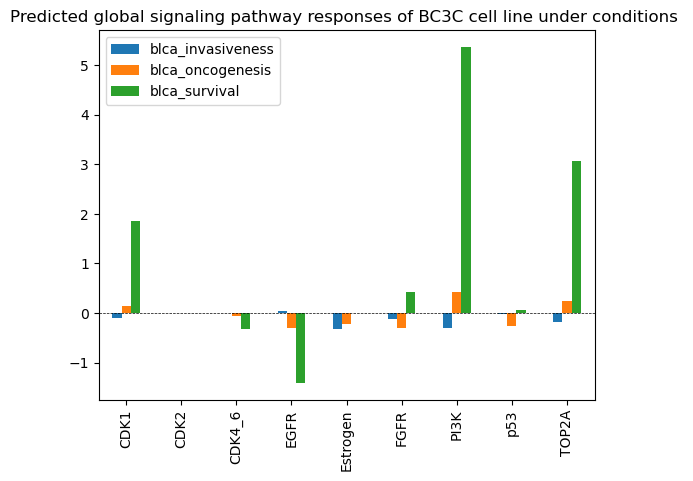

In [20]:
import matplotlib.pyplot as plt
t_df_subset.plot.bar()
plt.axhline(y=0, linestyle='--', color='black',linewidth=0.5)
plt.title(f"Predicted global signaling pathway responses of {cell_line} cell line under conditions ")

In [21]:
display(rm_filt)
rm_subset=rm_filt[['CDK1', 'CDK2', 'CDK4_6', 'EGFR', 'Estrogen', 'FGFR',
       'PI3K', 'p53', 'TOP2A']]

,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,-1.0,0.00000,0.0,0.000000,-0.047901,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK1,0.0,-1.00000,0.0,0.000000,0.000000,0.000000,0.229882,0.307452,0.000000,0.000000,0.0,0.0,0.0
CDK2,0.0,0.00000,-1.0,0.000000,0.000000,0.000000,0.041423,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.00000,0.0,-1.000000,0.378787,0.000000,0.000000,0.154817,0.000000,0.000000,0.0,0.0,0.0
EGFR,0.0,0.00000,0.0,0.230873,-1.000000,0.000000,0.000000,-0.304260,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.00000,0.0,0.000000,0.000000,-1.000000,0.265844,0.128354,0.000000,0.000000,0.0,0.0,0.0
FGFR,0.0,0.00000,0.0,0.000000,0.308449,0.000000,-1.000000,0.092666,0.134086,0.000000,0.0,0.0,0.0
PI3K,0.0,0.34729,0.0,0.000000,-0.190303,0.000000,0.000000,-1.000000,0.000000,0.570069,0.0,0.0,0.0
p53,0.0,0.00000,0.0,0.000000,0.233368,0.000000,0.000000,0.167861,-1.000000,0.000000,0.0,0.0,0.0
TOP2A,0.0,0.00000,0.0,0.000000,-0.134259,0.000000,0.000000,0.149809,0.000000,-1.000000,0.0,0.0,0.0


In [22]:
rm_subset=rm_subset.loc[['blca_invasiveness',	'blca_oncogenesis',	'blca_survival']]
rm_subset=rm_subset.T
display(rm_subset)

,blca_invasiveness,blca_oncogenesis,blca_survival
CDK1,0.000000,0.000000,0.000000
CDK2,0.000000,0.000000,0.000000
CDK4_6,0.000000,0.000000,0.000000
EGFR,0.000000,0.000000,0.000000
Estrogen,-0.324236,-0.212782,0.000000
FGFR,0.000000,-0.281100,0.000000
PI3K,-0.182442,0.369913,3.905812
p53,0.000000,-0.218790,0.000000
TOP2A,0.000000,0.000000,0.000000


Text(0.5, 1.0, 'Predicted local signaling pathway responses of BC3C cell line under conditions ')

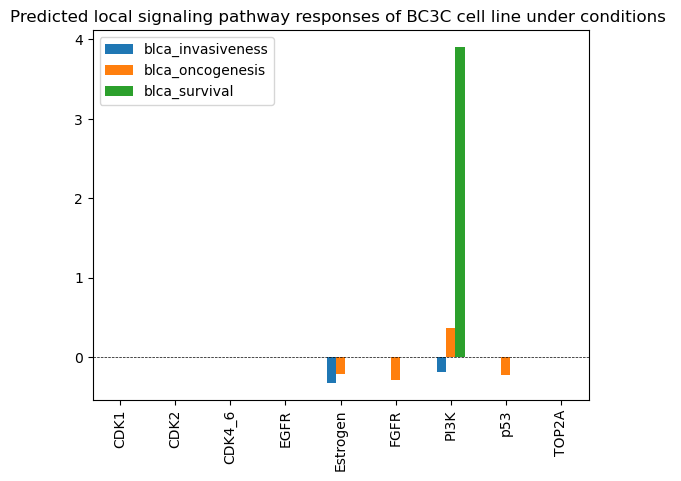

In [23]:
rm_subset.plot.bar()
plt.axhline(y=0, linestyle='--', color='black',linewidth=0.5)
plt.title(f"Predicted local signaling pathway responses of {cell_line} cell line under conditions ")